<a href="https://colab.research.google.com/github/ErenB02/comp_bio/blob/main/CS6405_CS3033_2425_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS3033/CS6405 - Data Mining - Second Assignment

Eren Boybay - 120446946 - CS6405

### Submission

You should submit a single .ipnyb file with your python code and analysis electronically via Canvas. Please note that this assignment will account for 25 Marks of your module grade.


### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>Physical fatigue significantly impacts performance, safety, and health in domains such as sports, rehabilitation, and workplace ergonomics. Traditional methods for estimating fatigue, such as subjective self-reports, often lack accuracy and real-time applicability. Leveraging wearable sensors like Inertial Measurement Units (IMU) and Electromyography (EMG) provides objective biomechanical data, capturing kinematic and neuromuscular changes during repetitive or prolonged physical activities.

The provided dataset was collected from 27 physically active participants performing shoulder internal rotation (IR) and external rotation (ER) exercises at varying resistance levels (30-40%, 40-50%, and 50-60% of their maximal voluntary contraction).
Your task is to develop a regression-based machine learning model to estimate perceived fatigue (Borg RPE scores) using the provided sensor data.

## Data Preparation

In [23]:
import pandas as pd

file_id = '1DP3G49DWVUaRBkn7wssPi6CfY1pTmTQP'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

df.head()

Subject  Repetition  X_Shoulder_acc_MPSD  X_Shoulder_acc_Freq_MPSD  \
0        1           1             2068.313                     0.000   
1        1           2              150.884                     0.699   
2        1           3              342.205                     0.000   
3        1           4              574.134                     0.000   
4        1           5              146.332                     1.993   

   X_Shoulder_acc_Power_Dominant_Band  X_Shoulder_acc_Ratio_Dominant_Band  \
0                               0.000                               0.000   
1                             150.884                               0.183   
2                               0.000                               0.000   
3                               0.000                               0.000   
4                             146.332                               0.123   

   X_Shoulder_acc_Total_LowFreq_Power  X_Shoulder_acc_Total_HighFreq_Power  \
0                            2318.602                              154.645   
1                             503.764                              322.154   
2                             862.122                              197.057   
3                            1007.744                              195.604   
4                             826.328                              364.276   

   X_Shoulder_acc_LowHigh_FreqRatio  X_Shoulder_acc_Total_Power  \
0                            14.993                    2473.247   
1                             1.564                     825.919   
2                             4.375                    1059.179   
3                             5.152                    1203.347   
4                             2.268                    1190.603   

   X_Shoulder_acc_PSD_Skewness  X_Shoulder_acc_PSD_Kurtosis  \
0                       12.176                      147.780   
1                        6.036                       40.822   
2                        7.898                       67.176   
3                       10.574                      117.893   
4                        4.069                       17.733   

   X_Shoulder_acc_DominantFreq_Range  Y_Shoulder_acc_MPSD  \
0                             11.613              552.939   
1                              8.042              158.123   
2                              8.027              310.216   
3                             10.653              116.092   
4                              4.319              238.233   

   Y_Shoulder_acc_Freq_MPSD  Y_Shoulder_acc_Power_Dominant_Band  \
0                     0.000                               0.000   
1                    12.238                             290.739   
2                     0.334                             310.216   
3                    11.340                             153.493   
4                     0.332                             238.233   

   Y_Shoulder_acc_Ratio_Dominant_Band  Y_Shoulder_acc_Total_LowFreq_Power  \
0                               0.000                             688.950   
1                               0.167                             389.380   
2                               0.293                             669.592   
3                               0.172                             251.264   
4                               0.147                             534.911   

   Y_Shoulder_acc_Total_HighFreq_Power  Y_Shoulder_acc_LowHigh_FreqRatio  \
0                              475.949                             1.448   
1                             1347.278                             0.289   
2                              390.832                             1.713   
3                              642.489                             0.391   
4                             1083.626                             0.494   

   Y_Shoulder_acc_Total_Power  Y_Shoulder_acc_PSD_Skewness  \
0                    1164.899                       11.533   
1                    1736.658       

<Axes: >

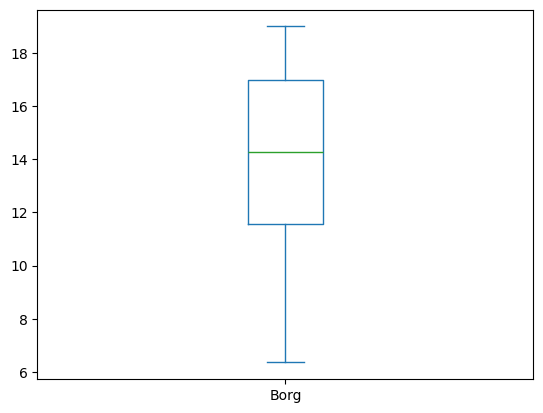

In [ ]:
# Label or target variable
df['Borg'].plot.box()

# Tasks

## Basic models and evaluation

Using Scikit-learn, train and evaluate K-NN and decision tree regressors using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset.
Compare the results of both classifiers and comment on their execution time in the test.


In [24]:
# YOUR CODE HERE
from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#First we extract the features and label
X = df.loc[:, "Subject":"RepetitionDuration_Palm_gyr_rtVar"]
y = df["Borg"]

#Split the data 70/30, random_state is included for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2)

#Scale dataset for KNN
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_knn = scaler.transform(X_train)
X_test_knn = scaler.transform(X_test)

#KNN Regressor
knn = neighbors.KNeighborsRegressor()

#Fit the knn regressor to training data
knn = knn.fit(X_train_knn, y_train)

#DT Regressor
dtr = tree.DecisionTreeRegressor(random_state=2)

#Fit the decision tree regressor to training data
dtr = dtr.fit(X_train, y_train)


In [25]:
#Check the score of the regressor on test data
from sklearn.metrics import root_mean_squared_error
y_pred = knn.predict(X_test_knn)
print(f"RMSE value: {root_mean_squared_error(y_test, y_pred)}")
print(f"R squared value: {knn.score(X_test_knn, y_test)}")

RMSE value: 2.553525586694294
R squared value: 0.3825217355770574


In [26]:
#Check the score of the regressor on test data
from sklearn.metrics import root_mean_squared_error
y_pred = dtr.predict(X_test)
print(f"RMSE value: {root_mean_squared_error(y_test, y_pred)}")
print(f"R squared value: {dtr.score(X_test, y_test)}")

RMSE value: 2.538809687004772
R squared value: 0.3896182494349537


- The prediction score of the decision tree regressor was better than the KNN model. Decision tree (DT) has a root mean squared value of 2.54 and the KNN with 2.55, thus in this scenario, the DT performs slighty better. Using the root mean squared error (RMSE) value aids in interpretability, since the prediction of the model will be in the same units as the target variable. RMSE values closer to 0 showcase better performance as the difference between the true value and prediction value is much smaller, while values further from 0 will reflect poorer performance.


- We will also normalize the dataset values particularly for the KNN regressor, this will improve the performance of the model.

- Regarding execution times on the test, the DT also performs better when fitting and obtaining score to the test data. The DT executes in 0.037 seconds while the KNN fits in 1.046 seconds.

## Robust evaluation

In this section, try to improve the accuracy by creating a pipeline. Consider the techniques we have covered during the semester, and try to improve the accuracy of a Decision tree regressor.
Your report should provide concrete information of your reasoning; everything should be well-explained.
Do not get stressed if the things you try do not improve the accuracy. The key to getting good marks is to show that you evaluated different methods and that you correctly selected the configuration.


In [28]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Create pipeline
regressorDT = Pipeline([
        ('regressor', tree.DecisionTreeRegressor(random_state=2))])

#Create parameter grid
dt_param_grid = {
    "regressor__criterion": ["squared_error", "absolute_error"],
    "regressor__max_depth": [None, 3, 5],
    "regressor__min_samples_split": [2, 5]}

#Initialize GridSearchCV
dtr_gs = GridSearchCV(regressorDT, dt_param_grid, scoring="neg_mean_squared_error")

#Fit the GridSearchCV object to the training dataset
dtr_gs.fit(X_train, y_train)

#Upon fitting we can access the optimal parameters from the best model
print(f"Best gridsearch parameters: {dtr_gs.best_params_}, best MSE score {dtr_gs.best_score_}")


#Take the best hyperparameters from the GridSearch and use regressor pipeline
regressorDT.set_params(**dtr_gs.best_params_)
# Fit the pipeline with the training data using the best parameters found
regressorDT.fit(X_train, y_train)


# Calculate the accuracy on the test set
y_pred_test = regressorDT.predict(X_test)
print(f"RMSE value: {root_mean_squared_error(y_test, y_pred_test)}")
print(f"R squared value: {regressorDT.score(X_test, y_test)}")

Best gridsearch parameters: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 3, 'regressor__min_samples_split': 2}, best MSE score -4.987157981624906
RMSE value: 2.1245338347584606
R squared value: 0.5725665059363769


In [29]:
from sklearn.decomposition import PCA


# Create pipeline with SelectKBest for feature selection
regressorDT = Pipeline([
        ('dr', PCA()),
        ('regressor', tree.DecisionTreeRegressor(random_state=2))])  # Decision Tree Regressor

# Create parameter grid for GridSearchCV
dt_param_grid = {
    "regressor__criterion": ["squared_error", "absolute_error"],
    "regressor__max_depth": [None, 3, 5],
    "regressor__min_samples_split": [2, 5],
    "dr__n_components" : [10, 200, 300]}

# Initialize GridSearchCV with 'neg_mean_squared_error' for regression task
dtr_gs = GridSearchCV(regressorDT, dt_param_grid, scoring="neg_mean_squared_error")

# Fit the GridSearchCV object to the training dataset
dtr_gs.fit(X_train, y_train)

#Upon fitting we can access the optimal parameters from the best model
print(f"Best gridsearch parameters: {dtr_gs.best_params_}, best MSE score {dtr_gs.best_score_}")

# Take the best hyperparameters from the GridSearch and update the regressor pipeline
regressorDT.set_params(**dtr_gs.best_params_)

# Fit the pipeline with the training data using the best parameters found
regressorDT.fit(X_train, y_train)


y_pred = regressorDT.predict(X_test)
print(f"RMSE value: {root_mean_squared_error(y_test, y_pred)}")
print(f"R squared value: {regressorDT.score(X_test, y_test)}")

#MAYBE TRY 10

Best gridsearch parameters: {'dr__n_components': 200, 'regressor__criterion': 'squared_error', 'regressor__max_depth': 3, 'regressor__min_samples_split': 5}, best MSE score -9.868492720169384
RMSE value: 3.184259219028045
R squared value: 0.03980801453489935


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

regressorDT = Pipeline([
        ('fs', SelectKBest(score_func=mutual_info_regression)),
        ('regressor', tree.DecisionTreeRegressor(random_state=2))])

# Create parameter grid for GridSearchCV
dt_param_grid = {
    "regressor__criterion": ["squared_error"],
    "regressor__max_depth": [3, 5],
    "regressor__min_samples_split": [2, 5],
    "fs__k" : [10, 30, 50]}

# Initialize GridSearchCV with 'neg_mean_squared_error' for regression task
dtr_gs = GridSearchCV(regressorDT, dt_param_grid, scoring="neg_mean_squared_error", n_jobs=-1)

# Fit the GridSearchCV object to the training dataset
dtr_gs.fit(X_train, y_train)

#Upon fitting we can access the optimal parameters from the best model
print(f"Best gridsearch parameters: {dtr_gs.best_params_}, best MSE score {dtr_gs.best_score_}")

# Take the best hyperparameters from the GridSearch and update the regressor pipeline
regressorDT.set_params(**dtr_gs.best_params_)

# Fit the pipeline with the training data using the best parameters found
regressorDT.fit(X_train, y_train)

y_pred = regressorDT.predict(X_test)
print(f"RMSE value: {root_mean_squared_error(y_test, y_pred)}")
print(f"R squared value: {regressorDT.score(X_test, y_test)}")


### EXPLAIN WHY WE REDUCE RANGE OF PARAMETERS AND WHAT I MEANS
### NEED REASONING BEHIND IT


#### **Hyperparametrisation**
- We will deploy a hyperparametrisation of the parameters in order to find the most optimal parameters for the model as opposed to leaving default ones as these will not be optimal for all tasks. The goal here is to find the best hyperparameters that will maximise the performance of the model on the particular dataset. Rather than tuning these hyperparameters by user-input which can result in overfitting due to over-tuning the parameters, coss-validation will be deployed particularly GridSearchCV to find the optimal hyperparameters for the model. It is crucial to create a parameter grid for GridSearchCV to access a variety of parameters to find the optimal hyperparameters for the model, however it should be noted that the grid should consist of a manageable amount of parameters to avoid increasing computational effort and overfitting. The default cv value of 3 is used, this means that the model will split the datset into five equal parts, where k-1 folds will be used for training and the final part for validation. This is repeated for every fold, thus five different test folds will be used for testing. Typically, a smaller k fold value is used for larger and high dimensional datasets, while larger folds are fold smaller datasets.

- Regarding the GridSearchCV, we also define how the to evaluate the model. In this case we select 'neg_mean_squared_error' to minimize the mean squared error. This will quantify the size of the error between predictions of the model and a real output by obtaining the mean of squared differences between true target values and the predictions of the model. Again this loss will attribute greater penalties for more significant differences. GridSearchCV enables an exhaustive search over a user specified range of parameter values grid search provided by GridSearchCV exhaustively generates searches a grid of parameter values that were specified in the code above with dt_param_grid will be used to generate candidates for GridSearchCV.

- The application of GridSearchCV will begin by specifying the parameter grid, followed by initialising the GridSearch object with specified scoring and pipeline object. Following this, we will fit the GridSearch to the training data and eventually fit the optimal parameters to the pipeline regressor and evaluate this model on the test set.

##### *Parameters*
- The following parameters were chosen and here is why. To begin criterion for measuring the quality of split is selected to decide what function to deploy upon calculating the quality. We have mean squared error which will emphasize more high errors and have less effect induces by smaller errors and the mean absolute error which will be robust to potential outliers and not set proportions of importance to errors of any errors. The aim of this is to reduce impurity, thus we ideally want the value of the MSE to be as close to 0 as possible for each split.

- We will also include max_depth, which will determine the maximum depth of that the tree can reach. It is crucial to avoid setting this parameter to high, to avoid risk of overfitting however if set too low, the mode may not generalize well and pick up key patterns in the data.

- Finally the last parameter chosen, was min_samples split which determine the minimum amount of samples that is required to split an internal node. Essentially any node that has fewer samples than the specified amount, no split will occur. This will work alongside max_depth to control the depth of the tree and enable better generalisation performance of the model due to broader and meaningful splits. Generally speaking the parameters such as max_depth and and min_split will regularise the model and reduce risk of overfitting as the model is not left to train without any constraints.

- In this task, to possibly improve the accuracy of the DT regressor we can deploy dimensionality reduction, this will certainly reduce computational effort and training will be less time-consuming.

#### **Feature Extraction (PCA)**

- Additionally, the dataset consist of many features (583 rows, 2173 columns), thus the model may struggle to perform well in this high-dimensional data due to the high amount of features present in the data. One issue related to high-dimensional data refers curse of dimensionality where the effectiveness and efficiency of a model will degrade as the number of features grows. This issue can result in increased risk of overfitting, false correlations, irrelevant and redudant features, thus dimesionality reduction will be deployed to mitigate the issues described.

- Principal component analysis (PCA), is a feature extraction method that will be deployed in order to deal with these issues. PCA will reduce the number of features that preserve the information and also attempt to locate the most meaningful basis to re-express the dataset. Additionally, we hope to filter out any noise and redundancy with this new basis. The dimensionality of the dataset has been reduced from 2173 to 200.

- The n component value for PCA should retain as much variance within the dataset as possible, additionally we ensure that the value chosen is not small to avoid oversimplifying the data resulting in the model possessing poor generalization ability and perform poorly.


However as observed in the performance of the model on the test set, PCA has significantly dropped the performance of the model. This can be attributed to the fact that ...



#### **Feature Selection**


- Regarding the high-dimensional data another approach dimensionality reduction approach we can take, is feature selection particularly, SelectKBest. Regarding feature selection, the idea is to select a subset of original features from the dataset. As we observe 2173 features within the dataset, there are bound to be some features that do not contribute or perhaps contribute very little to the prediction of the target. In addition to selecting the most relevant features, other benefits of feature selection include a reduction in overfitting and training time and also overall accuracy.

- After running feature selection we see that this does not improve the score of the model by a significant amount, it does greatly reduce the training time and also further reduce risk of overfitting as we control the amount of noise within the data with feature selection.

- Further regarding SelectKBest, we introduce a range of K components that GridSearchCV will choose from. This range will enable reduction in risk of underfitting and overfitting.

- Mutual_info_regression is used as the scoring function for selected features, we deploy this function to capture non-linear relationships. In the event that non-linear relationship is present a scoring function such as f_regression may assign a low score to it and thus we can miss out on crucial features. Thus we use mutual info to capture more complex relationships present in the dataset.

---
- **NOTE THE ACCRURACIES OF THE MODELS AND DERSCIBRE WHY IT IS EITHER BETTER OR WORSE ???**

## New classifier

Replicate the previous task for a classifier that we did not cover in class (different than K-NN and decision trees). Briefly describe and justify your choice.
Try to create the best model for the given dataset.






In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the GBR model
GBoostR = GradientBoostingRegressor(random_state=2)
GBoostR.fit(X_train, y_train)

# Calculate and print the R² score on the test set
print(f"R² score on test set for GBR: {GBoostR.score(X_train, y_train)}")
print(f"R² score on test set for GBR: {GBoostR.score(X_test, y_test)}")


y_pred = GBoostR.predict(X_test)
print(f"RMSE value: {root_mean_squared_error(y_test, y_pred)}")
print(f"R squared value: {GBoostR.score(X_test, y_test)}")

In [ ]:
import xgboost as xgb

# Create and fit the XGBoost model
xgb = xgb.XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Calculate and print the R² score on the test set
print(f"R² score on train set for XGBoost: {xgb.score(X_train, y_train)}")
print(f"R² score on test set for XGBoost: {xgb.score(X_test, y_test)}")


y_pred = xgb.predict(X_test)
print(f"RMSE value: {root_mean_squared_error(y_test, y_pred)}")
print(f"R squared value: {xgb.score(X_test, y_test)}")

# - FITTING NOISE HERE AND NOT GENERALIZING WELL IN XGB, GBR IS BETTER

# - DECIDE WHETHER TO GO FOR EITHER XGB OR GBR

# - TRY EARLY STOPPING


In [22]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error


xgbr = Pipeline([
    ('fs', RFE(estimator = xgb.XGBRegressor(n_estimator=100, random_state=2), step=1)),
    ('xgb', xgb.XGBRegressor(random_state=42))
])

# xgbr_grid = {
#     'xgb__learning_rate': [0.01, 0.1],
#     'xgb__n_estimators': [100,200,300],
#     'xgb__max_depth': [3] #Stick with max_depth of 3 as this was consistently the optimal parameter in previous models
# }

# Grid search
# xgb_gs = GridSearchCV(xgbr, xgbr_grid, scoring='neg_mean_squared_error')
# xgb_gs.fit(X_train, y_train)
# xgbr.set_params(**xgb_gs.best_params_)
xgbr.fit(X_train, y_train)


y_pred = xgbr.predict(X_test)
print(f"RMSE value: {root_mean_squared_error(y_test, y_pred)}")
print(f"R squared value: {xgbr.score(X_test, y_test)}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:20:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:21:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:24:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:25:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  war

KeyboardInterrupt: 

## Evaluation on unseen instances (Only for CS6405)
Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently and load all the libraries you need as well.



In [ ]:
from joblib import dump, load
from io import BytesIO
import requests
import pandas as pd

# INSERT YOUR MODEL'S URL
mLink = 'https://github.com/andvise/my_model/raw/refs/heads/main/model.joblib'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

df = pd.read_csv("https://raw.githubusercontent.com/andvise/DM_Assignment_2425/refs/heads/main/test_data.csv")
